In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [2]:
dataframe = pd.read_csv("C:/Users/Tarun Singh/OneDrive/Desktop/DS Mini Project/exports-to-european-countries.csv")

In [3]:
dataframe.shape

(2690579, 15)

In [4]:
dataframe.isnull().sum()

id                      0
date                    0
country_name            0
alpha_3_code        11662
country_code        11662
region                  0
region_code             0
sub_region              0
sub_region_code         0
hs_code                 0
commodity               0
unit                 3442
value_qt            28256
value_rs               13
value_dl           120899
dtype: int64

In [5]:
# Preview column names to verify
print("Columns:", dataframe.columns)

Columns: Index(['id', 'date', 'country_name', 'alpha_3_code', 'country_code', 'region',
       'region_code', 'sub_region', 'sub_region_code', 'hs_code', 'commodity',
       'unit', 'value_qt', 'value_rs', 'value_dl'],
      dtype='object')


In [6]:
# Group by 'commodity' and sum the 'qty'
top_commodities = (
    dataframe.groupby('commodity', as_index=False)['value_qt']
    .sum()
    .sort_values(by='value_qt', ascending=False)
    .head(100)
)

# Display the top 100 commodities
print(top_commodities)

                                              commodity      value_qt
1015  Automotive Diesel Fuel, Not Containing Biodies...  1.339832e+10
1022  Aviation Turbine Fuels, Kerosene Type Conformi...  9.095461e+09
6297                                             Others  1.629810e+09
4970                                              Other  1.089407e+09
2656                               Electro-Cardiographs  8.765733e+08
...                                                 ...           ...
3864                      Jute Hand Bags/Shopping Bags.  5.113179e+07
9155                        Textured Yarn Of Polyesters  5.109601e+07
5111  Other Ball-Point Pens Without Liquid Ink (For ...  5.104053e+07
5452                    Other Fruits Prepared/Preserved  5.049331e+07
9024                         T-Shirt Etc Of Othr Fibres  5.041409e+07

[100 rows x 2 columns]


In [7]:
# Group by 'commodity' and sum the 'qty' to get top 100 commodities
top_100_commodities = (
    dataframe.groupby('commodity')['value_qt']
    .sum()
    .sort_values(ascending=False)
    .head(100)
    .index
)

# Filter the original DataFrame to keep only rows with those top 100 commodities
filtered_df = dataframe[dataframe['commodity'].isin(top_100_commodities)]

# Display the filtered data
print(filtered_df)

              id        date  \
2              2  2015-01-01   
19            19  2015-01-01   
21            21  2015-01-01   
23            23  2015-01-01   
24            24  2015-01-01   
...          ...         ...   
2690569  2690569  2025-03-01   
2690571  2690571  2025-03-01   
2690572  2690572  2025-03-01   
2690574  2690574  2025-03-01   
2690576  2690576  2025-03-01   

                                              country_name alpha_3_code  \
2                                                  Albania          ALB   
19                                                 Albania          ALB   
21                                                 Albania          ALB   
23                                                 Albania          ALB   
24                                                 Albania          ALB   
...                                                    ...          ...   
2690569  United Kingdom of Great Britain and Northern I...          GBR   
2690571  United

In [8]:
filtered_df.shape

(345777, 15)

In [9]:
filtered_df.isnull().sum()

id                     0
date                   0
country_name           0
alpha_3_code        1325
country_code        1325
region                 0
region_code            0
sub_region             0
sub_region_code        0
hs_code                0
commodity              0
unit                   0
value_qt            2272
value_rs               2
value_dl           12939
dtype: int64

In [10]:
# Drop rows with any null values
filtered_df_clean = filtered_df.dropna()

# Show the shape before and after dropping null values
print("Shape before dropping null values:", filtered_df.shape)
print("Shape after dropping null values:", filtered_df_clean.shape)

# Update our DataFrame with the cleaned version
filtered_df = filtered_df_clean

# Verify that there are no more null values
print("\nNull values after cleaning:")
print(filtered_df.isnull().sum())

Shape before dropping null values: (345777, 15)
Shape after dropping null values: (330610, 15)

Null values after cleaning:
id                 0
date               0
country_name       0
alpha_3_code       0
country_code       0
region             0
region_code        0
sub_region         0
sub_region_code    0
hs_code            0
commodity          0
unit               0
value_qt           0
value_rs           0
value_dl           0
dtype: int64
 (345777, 15)
Shape after dropping null values: (330610, 15)

Null values after cleaning:
id                 0
date               0
country_name       0
alpha_3_code       0
country_code       0
region             0
region_code        0
sub_region         0
sub_region_code    0
hs_code            0
commodity          0
unit               0
value_qt           0
value_rs           0
value_dl           0
dtype: int64


In [11]:
# Optional: Save the filtered data to a new CSV
filtered_df.to_csv('top_100_commodities_full_data.csv', index=False)

In [12]:
df = pd.read_csv("C:/Users/Tarun Singh/OneDrive/Desktop/DS Mini Project/top_100_commodities_full_data.csv")

In [13]:
# Check for duplicate records
duplicate_rows = df[df.duplicated()]

# Display number of duplicate rows
print(f"Number of duplicate records: {duplicate_rows.shape[0]}")

# Optionally, display the duplicate rows
if not duplicate_rows.empty:
    print("\nDuplicate Records:")
    print(duplicate_rows)
else:
    print("No duplicate records found.")

Number of duplicate records: 0
No duplicate records found.


In [14]:
df.head()

id        date country_name alpha_3_code  country_code  region  \
0   2  2015-01-01      Albania          ALB           8.0  Europe   
1  21  2015-01-01      Albania          ALB           8.0  Europe   
2  23  2015-01-01      Albania          ALB           8.0  Europe   
3  24  2015-01-01      Albania          ALB           8.0  Europe   
4  27  2015-01-01      Albania          ALB           8.0  Europe   

   region_code       sub_region  sub_region_code   hs_code  \
0          150  Southern Europe               39  29221990   
1          150  Southern Europe               39  61091000   
2          150  Southern Europe               39  68022190   
3          150  Southern Europe               39  68022390   
4          150  Southern Europe               39  76012020   

                     commodity unit  value_qt  value_rs  value_dl  
0                        Other  Kgs      0.02      4.97      0.01  
1       T-Shirts Etc Of Cotton  Nos     17.35     12.11      0.02  
2                       Others  Kgs     10.00      5.03      0.01  
3                       Others  Kgs    339.60     98.34      0.16  
4  Aluminium Billets - Alloyed  Kgs    150.00    247.37      0.40

In [15]:
df.shape

(330610, 15)

In [16]:
# --- Data Cleaning: Remove rows where commodity is 'Others' ---
print(f"Initial number of rows: {len(df)}")
# Define the exact commodity names to be removed
commodities_to_remove = ['Others']
# Filter the DataFrame, keeping only rows where 'commodity' is NOT in the removal list.
# Using .isin() is precise and avoids accidentally removing commodities that contain the word 'Other'.
df = df[~df['commodity'].isin(commodities_to_remove)]
print(f"Number of rows after removing 'Others': {len(df)}")

Initial number of rows: 330610
Number of rows after removing 'Others': 178200


In [17]:
# --- Define the mapping from commodity to category ---
# Based on the user-provided reference. Ambiguities are resolved by selecting the most logical category.
# For example, Benzene is categorized as a Chemical, not a Metal.
commodity_to_category_map = {
    # 1. Textiles & Garments
    'T-Shirts Etc Of Cotton': 'Textiles & Garments',
    'Nightdresses And Pyjamas Of Cotton': 'Textiles & Garments',
    'T-Shirt Etc Of Othr Fibres': 'Textiles & Garments',
    'Hand Bags/Shopping Bags Of Cotton': 'Textiles & Garments',
    'Jute Hand Bags/Shopping Bags': 'Textiles & Garments',
    'Other Hosiery Goods Of Cotton': 'Textiles & Garments',
    'Grey': 'Textiles & Garments',
    'Hessian Cloth Contng 100% By Wt Of Jute': 'Textiles & Garments',
    'Textured Yarn Of Polyesters': 'Textiles & Garments',
    'Othr Wven Fbrcs From Strip/The Like': 'Textiles & Garments',
    'Staple Fibres Of Polyester Nt Crd/Cmbd': 'Textiles & Garments',
    'Flexible Intermediate Bulk Containers Of Man Made Textile Materials': 'Textiles & Garments',
    'Of Cotton: Other': 'Textiles & Garments',
    'Jute Hand Bags/Shopping Bags.': 'Textiles & Garments',
    'Hessian Cloth Cntng 100% By Wt Of Jute.': 'Textiles & Garments',
    'Other Stone Cut(Topaz Aquamarine Etc)': 'Textiles & Garments',
    'Hessian Cloth Cntng 100% By Wt Of Jute.': 'Textiles & Garments',
    'Jute Hand Bags/Shopping Bags.': 'Textiles & Garments',

    # 2. Food, Agriculture & Animal Products
    'Basmati Rice': 'Food, Agriculture & Animal Products',
    'Rice Parboiled': 'Food, Agriculture & Animal Products',
    'Rice Excptg Parboiled (Excl Basmati Rice)': 'Food, Agriculture & Animal Products',
    'Other Sesamum Seeds W/N Broken': 'Food, Agriculture & Animal Products',
    'Cucumbers And Gherkins Provisionally Presvd': 'Food, Agriculture & Animal Products',
    'Cucmbrs And Ghrkns Prpd/Prsvd By Acetic Acid': 'Food, Agriculture & Animal Products',
    'Other Fruits Prepared/Preserved': 'Food, Agriculture & Animal Products',
    'Coffee Rob Cherry Other Grade': 'Food, Agriculture & Animal Products',
    'Coffee Rob Cherry AB': 'Food, Agriculture & Animal Products',
    'Grapes Fresh': 'Food, Agriculture & Animal Products',
    'Guar Meal': 'Food, Agriculture & Animal Products',
    'Meal Of Soyabean,Solvent Extracted (Defatted) Variety': 'Food, Agriculture & Animal Products',
    'Guargum: Others': 'Food, Agriculture & Animal Products',
    'Vannamei Shrimp (Litopenaeus Vannamei)': 'Food, Agriculture & Animal Products',
    'Coffee Rob Cherry Ab': 'Food, Agriculture & Animal Products',
    
    # 3. Minerals, Stones & Ceramics
    'Sandstone': 'Minerals, Stones & Ceramics',
    'Other Granite': 'Minerals, Stones & Ceramics',
    'Granite Crude Or Roughly Trimmed': 'Minerals, Stones & Ceramics',
    'Setts Curbstones And Flagstones Of Natural Stone(Except Slate)': 'Minerals, Stones & Ceramics',
    'Other Stone': 'Minerals, Stones & Ceramics',
    'Other Stone Cut (Topaz Aquamarine Etc)': 'Minerals, Stones & Ceramics',
    'Ball Clay': 'Minerals, Stones & Ceramics',
    'Other Kaoline-Cersmic Grade': 'Minerals, Stones & Ceramics',
    'Agate': 'Minerals, Stones & Ceramics',
    'Of A Water Absorption Coefficient By Weight Not Exceeding 0.5%': 'Minerals, Stones & Ceramics',
    'Other Stone Cut(Topaz Aquamarine Etc)': 'Minerals, Stones & Ceramics',

    # 4. Petroleum, Fuels & Chemicals
    'Automotive Diesel Fuel, Not Containing Biodiesel, Conforming To Standard IS 1460': 'Petroleum, Fuels & Chemicals',
    'High Flash High Speed Diesel Fuel Conforming To Standard IS 16861': 'Petroleum, Fuels & Chemicals',
    'Aviation Turbine Fuels, Kerosene Type Conforming To Standard IS 1571': 'Petroleum, Fuels & Chemicals',
    'Vacuum Gas Oil': 'Petroleum, Fuels & Chemicals',
    'Castor Oilandits Frctns Othr Thn Edble Grade': 'Petroleum, Fuels & Chemicals',
    'Carbon Blacks': 'Petroleum, Fuels & Chemicals',
    'Benzene': 'Petroleum, Fuels & Chemicals',
    'Other Amino Sulphonic Aniline Etc Nes': 'Petroleum, Fuels & Chemicals',
    'Other Industrial Monocarboxylic Fatty Acid': 'Petroleum, Fuels & Chemicals',
    'Aviation Turbine Fuels, Kerosene Type Conforming To Standard Is 1571': 'Petroleum, Fuels & Chemicals',
    'Othr Bentonite (Incl. Processed, Activatedand Ground': 'Petroleum, Fuels & Chemicals',
    'Automotive Diesel Fuel, Not Containing Biodiesel, Conforming To Standard Is 1460': 'Petroleum, Fuels & Chemicals',
    'High Flash High Speed Diesel Fuel Conforming To Standard Is 16861': 'Petroleum, Fuels & Chemicals',

    # 5. Metals & Metallurgical Products
    'Aluminium Billets - Alloyed': 'Metals & Metallurgical Products',
    'Aluminium Ingots-Not Alloyed': 'Metals & Metallurgical Products',
    'Bright Bars-Nckl Chromium Austenitic Type': 'Metals & Metallurgical Products',
    'Othr Screws And Bolts W/N Wth Nuts Or Washers Threaded': 'Metals & Metallurgical Products',
    'Other Cast Artcles Of Iron Malleable': 'Metals & Metallurgical Products',
    'Other Cast Articles Of Iron Or Steel N.E.S': 'Metals & Metallurgical Products',
    'All Other Articles Of Iron/Steel Nes': 'Metals & Metallurgical Products',
    'Ferro-Silico-Manganese': 'Metals & Metallurgical Products',
    'Fero-Manganese,Carbon Contng>2% By Weight': 'Metals & Metallurgical Products',
    'Other Ferro-Manganese': 'Metals & Metallurgical Products',
    'Othr Prdcts Of Iron/Non-Alloy Steel Otherwise Pltd/Cotd Wth Zinc': 'Metals & Metallurgical Products',
    'Flt-Rld Prdcts Of Iron/Non Aloy Stl Pltd Or Cotd Wth Aluminium Zinc Alloys': 'Metals & Metallurgical Products',
    'Wire Of Stainls Stl Thicker Than 1.5 Mm': 'Metals & Metallurgical Products',
    'Other,Welded,Of Circular Cross-Section, Made Up Of Of Non-Ally Steel Tube/Pipes': 'Metals & Metallurgical Products',
    'Strips Of Flt Rld Prdcts In Coils Nt Frthrwrkd Thn Cold Rld Of Thckns >1Mm But <3Mm': 'Metals & Metallurgical Products',
    'Strips Of Flt Rld Prdcts In Coils Nt Frthrwrkd Thn Cold Rld Of Thckns>=0.5Mm But<1Mm': 'Metals & Metallurgical Products',
    'Sheets Of Flat-Rold Prdcts In Coils Of A Thckns< 3 Mm Hot-Rld,Excl.Pickl': 'Metals & Metallurgical Products',
    'Strips Of Flat-Rold Prdcts In Coils Of A Thckns>=3 But< 4.75Mm Hot-Rld,Excl.Pickl': 'Metals & Metallurgical Products',
    'Strips Of Flat-Rold Prdcts In Coils Of A Thckns< 3 Mm Hot-Rld,Excl.Pickl': 'Metals & Metallurgical Products',
    'Unvrsl Plates Of Flat-Rold Prdcts Not In Coils Of Thckns Excd 10 Mm Hot-Rld Pickld': 'Metals & Metallurgical Products',
    'Other Plates,Sheets,Strips': 'Metals & Metallurgical Products',
    'Othr Iron/Non Aloy Steel In Prmry Frms Nes': 'Metals & Metallurgical Products',
    'Spun Pipe': 'Metals & Metallurgical Products',
    'Agglomerated Iron Ore Pellets': 'Metals & Metallurgical Products',
    'Alumina Calcined, Metallurgical Grade, Conforming To Is 17441': 'Metals & Metallurgical Products',
    'All Other Articles Of Iron/Steel Nes Other Steering Or Rudder Equipment For Ships And Boats, N.E.S.': 'Metals & Metallurgical Products',

    # 6. Electronics, Electricals & Telecom
    'Sim Cards': 'Electronics, Electricals & Telecom',
    'Optical Fibre Cables Other Thn Lead Alloy Sheathd Cables': 'Electronics, Electricals & Telecom',
    'Proximity Cards And Tags': 'Electronics, Electricals & Telecom',
    'Othr Elctrc Cndctrs Not Fitted Wth Connctrs Used In Telecom Fr <=1000V Excl Papr Plsctic And Rubber Insulated': 'Electronics, Electricals & Telecom',
    'Plstic Insltd Cndctrs Fr <= 1000V Not Fitted With Connectors': 'Electronics, Electricals & Telecom',
    'Othr Fxd Capactrs Dielctrc Of Papr/Plstcs': 'Electronics, Electricals & Telecom',
    'Plugs And Sockets Of Plstcs': 'Electronics, Electricals & Telecom',
    'Prdcts Paintd,Vrnshd/Coatd Wth Plstcs': 'Electronics, Electricals & Telecom',
    'Fxd Crbn Resistors,Composition/Film Types': 'Electronics, Electricals & Telecom',
    'Electro-Cardiographs': 'Electronics, Electricals & Telecom',

    # 7. Medical & Surgical Equipment
    'Surgical Knives,Sciss0Rs And Blade': 'Medical & Surgical Equipment',
    'Cannulae': 'Medical & Surgical Equipment',
    'Syringes,W/N With Needles': 'Medical & Surgical Equipment',
    'Catheters (For Urine,Stool)': 'Medical & Surgical Equipment',
    'Of A Kind Used For Medical, Surgical, Dental Or Veterinary Purposes': 'Medical & Surgical Equipment',

    # 8. Machinery & Industrial Components
    'Otr Prtsandaccssrs Of Vhcls Of Hdg 8701-8705': 'Machinery & Industrial Components',
    'Prts Of Othr Excvtng,Lvlng,Tmpng And Excvtngmchnry Fr Earth Mnrl/Ores,Slf-Prpld': 'Machinery & Industrial Components',
    'Bords,Panels,Consoles Etc.Fr Indstrl Use': 'Machinery & Industrial Components',

    # 9. Plastic, Packaging & Related
    'Pltes Shts Etc Of Plyethyln Terephthalte Flexible, Plain': 'Plastic, Packaging & Related',
    'Sack And Bag (Incl Cones)Of Othr Plastic Nes': 'Plastic, Packaging & Related',

    # 10. Stationery & Consumer Goods
    'Tooth Brushes': 'Stationery & Consumer Goods',
    'Other Ball-Point Pens With Liquid Ink (For Rolling Ball Pen)': 'Stationery & Consumer Goods',
    'Other Ball-Point Pens Without Liquid Ink (For Rolling Ball Pen)': 'Stationery & Consumer Goods',
    'Parts Of Lighters': 'Stationery & Consumer Goods',

    # 11. Toys & Miscellaneous
    'Non-Electronic Toys Etc.': 'Toys & Miscellaneous',
    'C0Ir Pith': 'Toys & Miscellaneous',
    
    # 12. Other
   'Other': 'Other',
   'Other Stone Cut(Topaz Aquamarine Etc)': 'Other',
   'All Other Articles Of Iron/Steel Nes Other Steering Or Rudder Equipment For Ships And Boats, N.E.S.': 'Other',
}

In [18]:
# --- Process the DataFrame ---

# Create the new 'categories' column by mapping the 'commodity' column using the dictionary
# .map() is an efficient way to apply this transformation
categories_column = df['commodity'].map(commodity_to_category_map)

# Find the index position of the 'commodity' column
try:
    commodity_index = df.columns.get_loc('commodity')
    # The new column will be inserted at the position immediately after 'commodity'
    insert_position = commodity_index + 1

    # Insert the newly created column into the DataFrame at the calculated position
    df.insert(insert_position, 'categories', categories_column)

    print("Success: The 'categories' column has been created and inserted.")

except KeyError:
    print("Error: The 'commodity' column was not found in the CSV file.")
    exit()


Success: The 'categories' column has been created and inserted.


In [19]:
# --- Verification and Output ---

# Display the first 10 rows of the key columns to show the result
print("\n--- DataFrame Head with New 'categories' Column ---")
print(df[['commodity', 'categories', 'value_rs']].head(10))

# Display the distribution of the new categories to get an overview
print("\n--- Distribution of Categories ---")
print(df['categories'].value_counts())

# Check for any commodities that were not successfully mapped to a category
unmapped_count = df['categories'].isnull().sum()
if unmapped_count > 0:
    print(f"\nWarning: Found {unmapped_count} rows with unmapped commodities.")
    print("This means their 'commodity' name was not in the provided mapping list.")
    print("\n--- Sample of Unmapped Commodities ---")
    # Display the commodity names that were not found in the map
    print(df[df['categories'].isnull()]['commodity'].value_counts().head(10))
else:
    print("\nSuccess: All commodities were successfully mapped to a category.")


--- DataFrame Head with New 'categories' Column ---
                            commodity                           categories  \
0                               Other                                Other   
1              T-Shirts Etc Of Cotton                  Textiles & Garments   
4         Aluminium Billets - Alloyed      Metals & Metallurgical Products   
6                               Other                                Other   
7                           Sim Cards   Electronics, Electricals & Telecom   
8                        Basmati Rice  Food, Agriculture & Animal Products   
9      Other Sesamum Seeds W/N Broken  Food, Agriculture & Animal Products   
10                          Sandstone          Minerals, Stones & Ceramics   
14                              Other                                Other   
15  Hand Bags/Shopping Bags Of Cotton                  Textiles & Garments   

    value_rs  
0       4.97  
1      12.11  
4     247.37  
6       0.96  
7      21.83 

In [ ]:
# --- Export the final DataFrame to a new CSV file ---
try:
    # Save the DataFrame to a new CSV file. index=False prevents pandas from writing row indices into the file.
    df.to_csv('Cleaned_top_100_with_categories_full_data.csv', index=False)
    print("\nSuccess: The DataFrame with categories has been saved to 'top_100_with_categories.csv'.")
except Exception as e:
    print(f"\nError: Could not save the file. Reason: {e}")


Success: The DataFrame with categories has been saved to 'top_100_with_categories.csv'.


In [21]:
# The first column 'id' seems to be an index and not useful for analysis.
# Let's drop it.
df.drop(columns=['id'], inplace=True)

In [22]:
df.shape

(178200, 15)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178200 entries, 0 to 330609
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             178200 non-null  object 
 1   country_name     178200 non-null  object 
 2   alpha_3_code     178200 non-null  object 
 3   country_code     178200 non-null  float64
 4   region           178200 non-null  object 
 5   region_code      178200 non-null  int64  
 6   sub_region       178200 non-null  object 
 7   sub_region_code  178200 non-null  int64  
 8   hs_code          178200 non-null  int64  
 9   commodity        178200 non-null  object 
 10  categories       178200 non-null  object 
 11  unit             178200 non-null  object 
 12  value_qt         178200 non-null  float64
 13  value_rs         178200 non-null  float64
 14  value_dl         178200 non-null  float64
dtypes: float64(4), int64(3), object(8)
memory usage: 21.8+ MB


In [24]:
df.describe()

country_code  region_code  sub_region_code       hs_code  \
count  178200.000000     178200.0    178200.000000  1.782000e+05   
mean      466.382576        150.0       123.273676  5.707404e+07   
std       241.312033          0.0        50.594573  2.540929e+07   
min         8.000000        150.0        39.000000  3.023900e+06   
25%       276.000000        150.0        39.000000  3.920622e+07   
50%       442.000000        150.0       154.000000  6.109909e+07   
75%       703.000000        150.0       155.000000  7.326910e+07   
max       832.000000        150.0       155.000000  9.705390e+07   

           value_qt       value_rs       value_dl  
count  1.782000e+05  178200.000000  178200.000000  
mean   2.137697e+05     278.760697       0.583055  
std    1.052558e+07    2042.053711       8.072622  
min    0.000000e+00       0.000000       0.000000  
25%    3.357500e+00       1.790000       0.010000  
50%    4.556000e+01      19.690000       0.050000  
75%    5.057400e+02     114.032500       0.250000  
max    1.773580e+09  392531.250000    1311.200000

In [25]:
print("--- Data Cleaning and Preprocessing ---")
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\n")

# The 'country_code' and 'alpha_3_code' have some missing values.
# Given that 'country_name' is present, we can proceed. For geographical plots,
# we might need to handle these missing codes if they cause issues.

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Extract year and month for time-series analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

print("Data types converted and 'year', 'month' columns added.")
print(df.head())
print("\n" + "="*50 + "\n")

--- Data Cleaning and Preprocessing ---
Missing values per column:
date               0
country_name       0
alpha_3_code       0
country_code       0
region             0
region_code        0
sub_region         0
sub_region_code    0
hs_code            0
commodity          0
categories         0
unit               0
value_qt           0
value_rs           0
value_dl           0
dtype: int64


Data types converted and 'year', 'month' columns added.
        date country_name alpha_3_code  country_code  region  region_code  \
0 2015-01-01      Albania          ALB           8.0  Europe          150   
1 2015-01-01      Albania          ALB           8.0  Europe          150   
4 2015-01-01      Albania          ALB           8.0  Europe          150   
6 2015-01-01      Albania          ALB           8.0  Europe          150   
7 2015-01-01      Albania          ALB           8.0  Europe          150   

        sub_region  sub_region_code   hs_code                    commodity  \
0  Sou

In [26]:
unique_counts = df['categories'].value_counts()
unique_counts

categories
Other                                  70457
Textiles & Garments                    29851
Metals & Metallurgical Products        19323
Food, Agriculture & Animal Products    15588
Minerals, Stones & Ceramics             8771
Electronics, Electricals & Telecom      8644
Machinery & Industrial Components       6080
Medical & Surgical Equipment            5164
Petroleum, Fuels & Chemicals            4898
Plastic, Packaging & Related            3867
Stationery & Consumer Goods             3750
Toys & Miscellaneous                    1807
Name: count, dtype: int64

#  Univariate Analysis (Analyzing single variables)


In [27]:
# Distribution of Export Value in Dollars
# Using a histogram to see the distribution of the target variable 'value_dl'
# We use a log scale to handle the skewness of the data
fig_val_dist = px.histogram(df, x='value_dl',
                            title='Distribution of Export Value (in US Dollars)',
                            labels={'value_dl': 'Value in Dollars'},
                            log_y=True,
                            marginal="box")
fig_val_dist.update_layout(bargap=0.1)
fig_val_dist.show()
# Insight: The export values are heavily right-skewed, meaning most exports
# have a lower value, with a few very high-value exports. The box plot shows many outliers.


In [28]:
# Top 15 Exporting Countries
top_countries = df['country_name'].value_counts().nlargest(15)
fig_top_countries = px.bar(top_countries,
                           x=top_countries.index,
                           y=top_countries.values,
                           title='Top 15 Destination Countries (by number of consignments)',
                           labels={'x': 'Country', 'y': 'Number of Consignments'},
                           color=top_countries.values,
                           color_continuous_scale=px.colors.sequential.Plasma)
fig_top_countries.show()
# Insight: The United States is the most frequent destination for exports,
# followed by the UAE and the UK.

In [29]:
# Distribution of Export Categories
category_counts = df['categories'].value_counts()
fig_categories = px.pie(category_counts,
                        values=category_counts.values,
                        names=category_counts.index,
                        title='Distribution of Export Categories',
                        hole=0.3)
fig_categories.update_traces(textposition='inside', textinfo='percent+label')
fig_categories.show()
# Insight: 'Metals & Metal Products', 'Chemicals & Allied Products', and
# 'Textiles & Garments' are the most dominant export categories.

C:\Users\Tarun Singh\AppData\Local\Temp\ipykernel_9596\2127259845.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




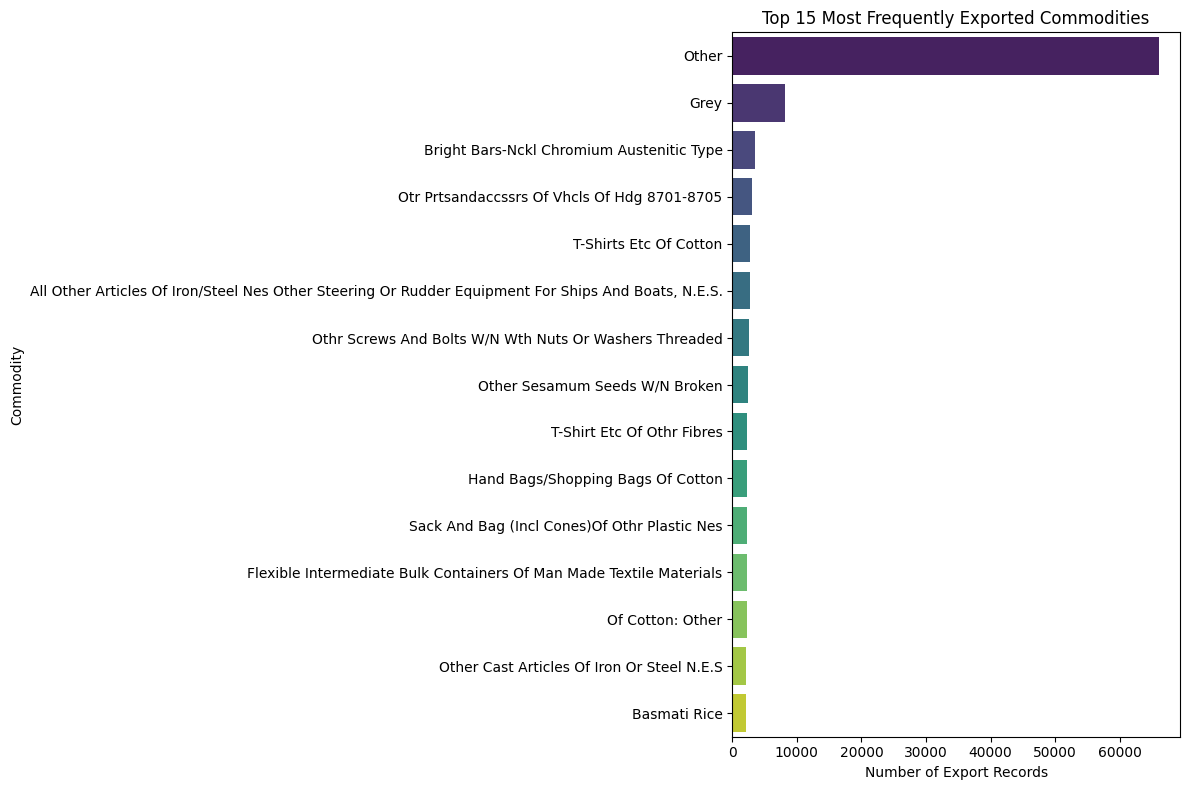

In [30]:
# Top 15 Exported Commodities
plt.figure(figsize=(12, 8))
top_commodities = df['commodity'].value_counts().nlargest(15)
sns.barplot(y=top_commodities.index, x=top_commodities.values, palette='viridis', orient='h')
plt.title('Top 15 Most Frequently Exported Commodities')
plt.xlabel('Number of Export Records')
plt.ylabel('Commodity')
plt.tight_layout()
plt.show()

# Bivariate and Multivariate Analysis

In [31]:
print("--- Starting Bivariate and Multivariate Analysis ---")

# Total Export Value by Category
value_by_category = df.groupby('categories')['value_dl'].sum().sort_values(ascending=False)
fig_val_by_cat = px.bar(value_by_category,
                        x=value_by_category.index,
                        y=value_by_category.values,
                        title='Total Export Value (USD) by Category',
                        labels={'x': 'Category', 'y': 'Total Value (USD)'},
                        color=value_by_category.values,
                        color_continuous_scale=px.colors.sequential.Viridis)
fig_val_by_cat.show()
# Insight: While 'Metals & Metal Products' had a high number of consignments,
# 'Mineral Products' generate the highest total export value, indicating higher value per consignment.


--- Starting Bivariate and Multivariate Analysis ---


In [32]:
# Total Export Value by Sub-Region
value_by_subregion = df.groupby('sub_region')['value_dl'].sum().sort_values(ascending=False)
fig_val_by_subregion = px.bar(value_by_subregion,
                           x=value_by_subregion.index,
                           y=value_by_subregion.values,
                           title='Total Export Value (USD) by Sub-Region',
                           labels={'x': 'Sub-Region', 'y': 'Total Value (USD)'},
                           color=value_by_subregion.values,
                           color_continuous_scale=px.colors.sequential.Cividis)
fig_val_by_subregion.show()
# Insight: This visualization shows a more detailed geographical breakdown of export values
# across different sub-regions, providing finer granularity than the regional view.

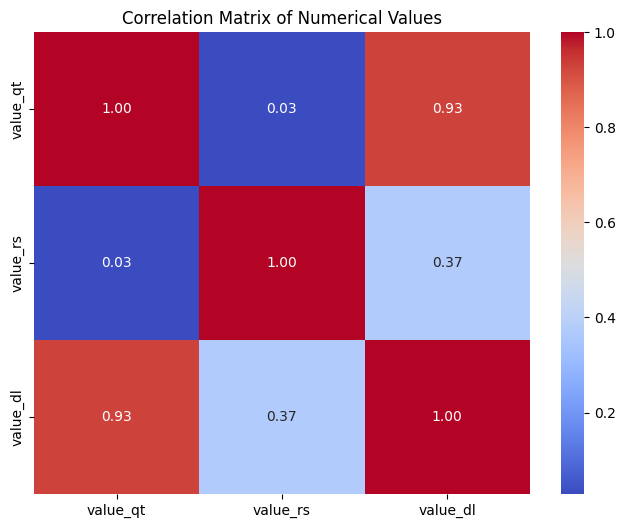

In [33]:
# Correlation Heatmap for Numerical Columns
# This helps to see the linear relationship between numerical variables.
corr_matrix = df[['value_qt', 'value_rs', 'value_dl']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Values')
plt.show()
# Insight: As expected, `value_rs` (Rupees) and `value_dl` (Dollars) are almost perfectly
# correlated. `value_qt` (quantity) has a weaker positive correlation with value,
# which makes sense as different items have different prices per unit.

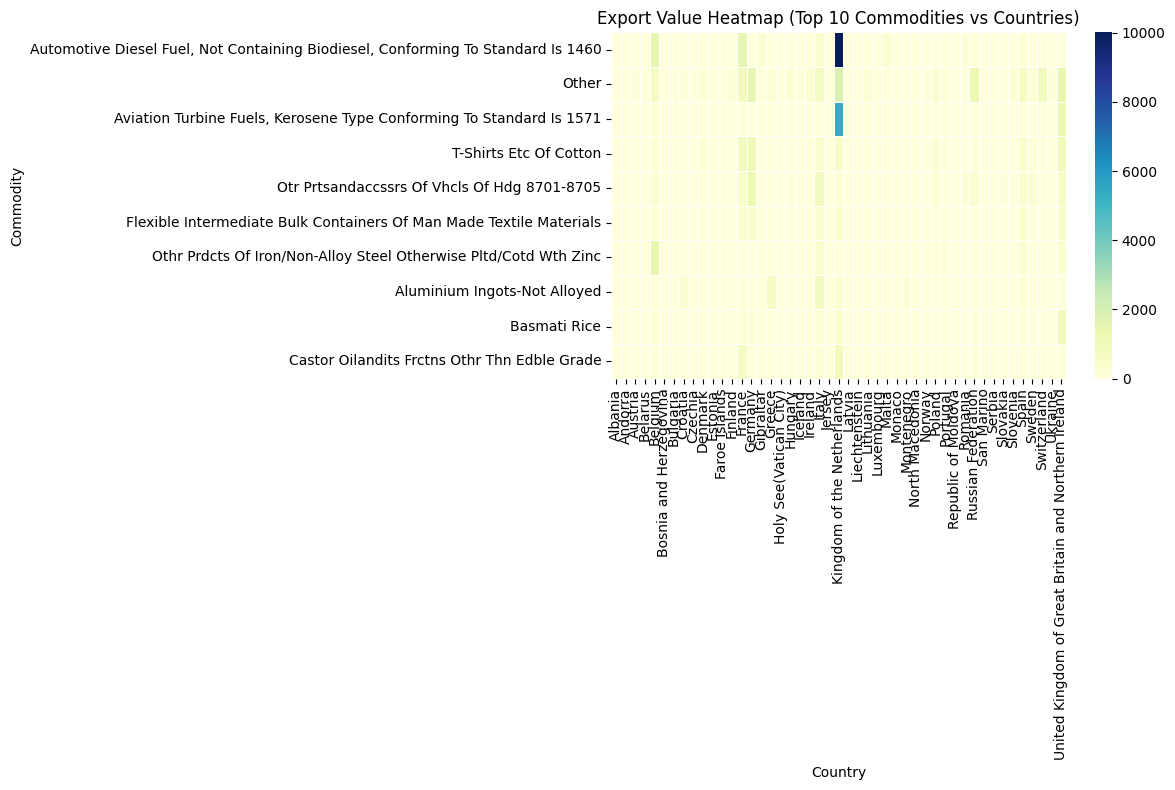

In [34]:
# Pivot the data
heatmap_data = df.pivot_table(values='value_dl', index='commodity', columns='country_name', aggfunc='sum').fillna(0)

# Reduce size if needed for clarity
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).head(10).index]

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', linewidths=0.5)
plt.title("Export Value Heatmap (Top 10 Commodities vs Countries)")
plt.xlabel("Country")
plt.ylabel("Commodity")
plt.tight_layout()
plt.show()


# Time Series Analysis

In [35]:
print("--- Starting Time Series Analysis ---")

# Total Export Value Over Time
df_time = df.groupby('date')['value_dl'].sum().reset_index()
fig_time_series = px.line(df_time, x='date', y='value_dl',
                          title='Total Export Value (USD) Over Time')
fig_time_series.show()
# Insight: There are significant fluctuations in export value over the years.
# There appear to be some seasonal patterns and notable peaks and troughs.

--- Starting Time Series Analysis ---


In [36]:
# Monthly Export Value
monthly_value = df.groupby(['year', 'month'])['value_dl'].sum().reset_index()

# Create date string in 'YYYY-MM' format
monthly_value['date'] = monthly_value['year'].astype(str) + '-' + monthly_value['month'].astype(str).str.zfill(2)

fig_monthly_series = px.line(monthly_value, x='date', y='value_dl',
                             title='Total Monthly Export Value (USD)')
# Customize x-axis to show all months
fig_monthly_series.update_xaxes(tickangle=45, tickmode='array', ticktext=monthly_value['date'])
fig_monthly_series.show()
# Insight: Plotting by month shows the export value trends over time,
# making it easier to identify seasonal patterns and long-term trends.

# Geographical Analysis

In [37]:
print("--- Starting Geographical Analysis ---")

# Total Export Value by Country on a World Map
country_value = df.groupby(['country_name', 'alpha_3_code'])['value_dl'].sum().reset_index()

fig_map = px.choropleth(country_value,
                        locations="alpha_3_code",
                        color="value_dl",
                        hover_name="country_name",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title="Total Export Value (USD) by Country",
                        projection="natural earth")
fig_map.show()
# Insight: This map provides a powerful visual representation of the top export destinations
# by value. Countries like the USA, UAE, China, and parts of Europe are major importers.

--- Starting Geographical Analysis ---


# Top Commodities Analysis

In [38]:
print("--- Analyzing Top Commodities ---")

# Top 20 Commodities by Export Value
top_commodities = df.groupby('commodity')['value_dl'].sum().nlargest(20)
fig_top_comm = px.bar(top_commodities,
                      x=top_commodities.index,
                      y=top_commodities.values,
                      title='Top 20 Commodities by Total Export Value (USD)',
                      labels={'x': 'Commodity', 'y': 'Total Value (USD)'},
                      color=top_commodities.values,
                      color_continuous_scale=px.colors.sequential.Magma)
fig_top_comm.update_layout(xaxis_tickangle=-45)
fig_top_comm.show()
# Insight: 'Other' is a large category, suggesting a need for more granular data.
# Besides that, high-value items like 'Motor Car' and specific chemicals
# and metal products are top exports.

--- Analyzing Top Commodities ---


# Machine Learning

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [80]:
df_RF = df.copy()

In [81]:
# Drop the original 'date' and other non-predictive columns.
# We also drop 'value_rs' and 'value_qt' to avoid data leakage, as they are related to the target.
df_RF = df_RF.drop(['date', 'alpha_3_code', 'value_rs', 'value_qt', 'unit', 'hs_code'], axis=1)

# Handle categorical variables using one-hot encoding.
# This converts categorical columns into a format that can be provided to ML algorithms.
categorical_cols = ['country_name', 'region', 'sub_region', 'commodity', 'categories']
df_encoded_RF = pd.get_dummies(df_RF, columns=categorical_cols, drop_first=True)

print("Data preprocessing and feature engineering complete.")
print("Shape of the processed data:", df_encoded_RF.shape)


Data preprocessing and feature engineering complete.
Shape of the processed data: (178200, 164)


In [52]:
# Define Features (X) and Target (y)

# The target variable 'y' is what we want to predict, which is 'value_dl'.
# The features 'X' are all the other columns that we will use to make the prediction.
X = df_encoded_RF.drop('value_dl', axis=1)
y = df_encoded_RF['value_dl']

In [54]:
# Split Data into Training and Testing Sets

# We split the data to train the model on one part and test its performance on another, unseen part.
# test_size=0.2 means 20% of the data will be used for testing.
# random_state ensures that the split is the same every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 142560 samples
Testing set size: 35640 samples


In [55]:
# Train the Machine Learning Model

# We will use a RandomForestRegressor, which is an ensemble of decision trees.
# n_estimators is the number of trees in the forest.
# random_state is for reproducibility.
# n_jobs=-1 uses all available CPU cores for faster training.
print("\nTraining the RandomForestRegressor model...")
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("Model training complete.")


Training the RandomForestRegressor model...
Model training complete.
Model training complete.


In [56]:
# Evaluate the Model

# Make predictions on the test set to see how well the model performs.
print("\nEvaluating the model...")
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Evaluating the model...
Mean Absolute Error (MAE): 0.31
Mean Squared Error (MSE): 11.10
R-squared (R²): 0.70
Mean Absolute Error (MAE): 0.31
Mean Squared Error (MSE): 11.10
R-squared (R²): 0.70


C:\Users\Tarun Singh\AppData\Local\Temp\ipykernel_9596\2400133774.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




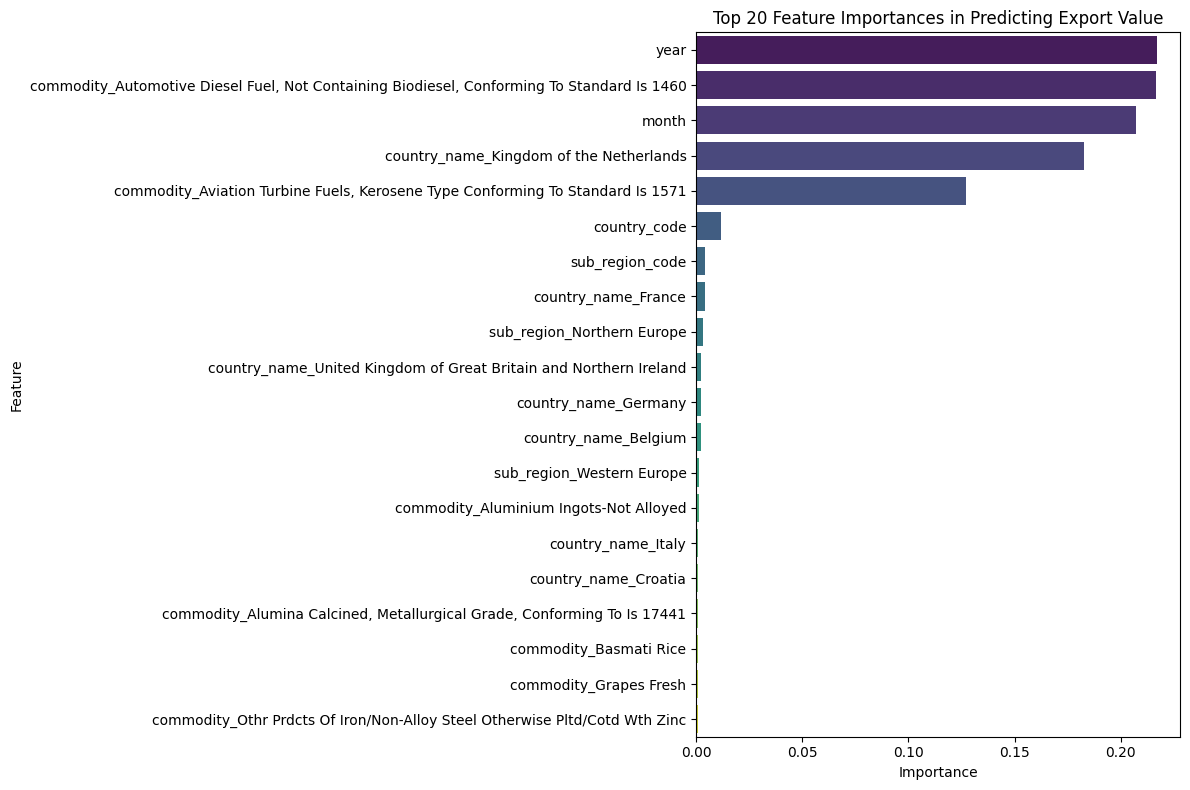


Feature importance analysis complete.


In [57]:
# Feature Importance

# Analyze which features were most influential in the model's predictions.
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization.
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the top 20 most important features.
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances in Predicting Export Value')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nFeature importance analysis complete.")

Linear Regression

In [60]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression

In [61]:
# Encoding categorical variables
dataFrame_encoded = df.copy()
dataFrame_encoded['commodity'] = LabelEncoder().fit_transform(dataFrame_encoded['commodity'])
dataFrame_encoded['country_name'] = LabelEncoder().fit_transform(dataFrame_encoded['country_name'])

# Features & target
X = dataFrame_encoded[['value_qt', 'value_rs', 'commodity', 'country_name']]
y = dataFrame_encoded['value_dl']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluation
print("Linear Regression R²:", r2_score(y_test, y_pred))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression R²: 0.9845659735414184
Linear Regression RMSE: 0.754556509669219


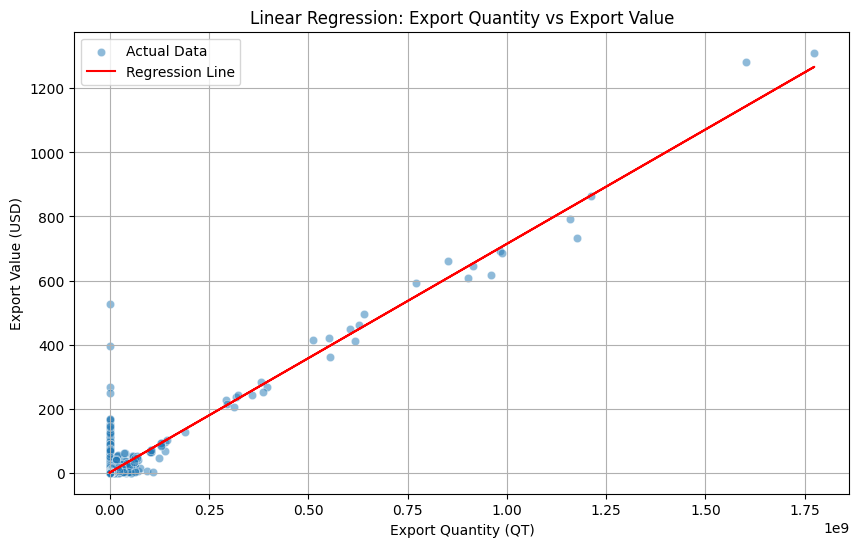

Intercept: 0.43
Coefficient (Slope): 0.00


In [62]:
# Reshape input for sklearn
X = df[['value_qt']].values
y = df['value_dl'].values

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['value_qt'], y=df['value_dl'], label="Actual Data", alpha=0.5)
plt.plot(df['value_qt'], y_pred, color='red', label='Regression Line')
plt.xlabel("Export Quantity (QT)")
plt.ylabel("Export Value (USD)")
plt.title("Linear Regression: Export Quantity vs Export Value")
plt.legend()
plt.grid(True)
plt.show()

# Print model summary
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient (Slope): {model.coef_[0]:.2f}")


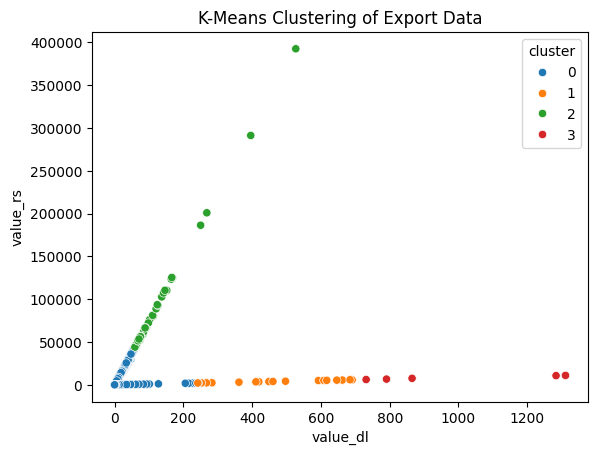

In [64]:
# Import KMeans for clustering
from sklearn.cluster import KMeans

# Clustering on export patterns
X_cluster = dataFrame_encoded[['value_dl', 'value_qt', 'value_rs']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
dataFrame_encoded['cluster'] = kmeans.fit_predict(X_scaled)

# Visualization
sns.scatterplot(data=dataFrame_encoded, x='value_dl', y='value_rs', hue='cluster', palette='tab10')
plt.title("K-Means Clustering of Export Data")
plt.show()

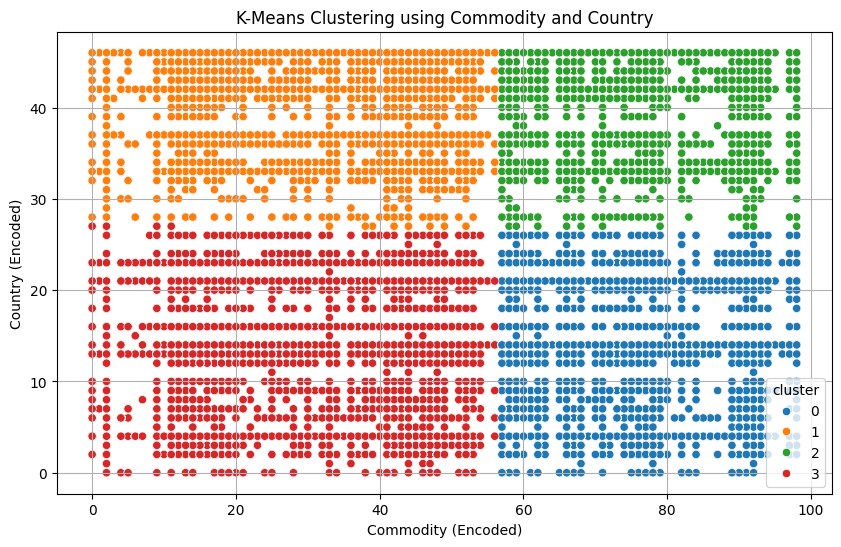

In [65]:
from sklearn.preprocessing import LabelEncoder

# Copy to avoid modifying original
dataFrame_cluster_cat = df.copy()

# Encode 'commodity' and 'country' as numerical features
dataFrame_cluster_cat['commodity_encoded'] = LabelEncoder().fit_transform(dataFrame_cluster_cat['commodity'])
dataFrame_cluster_cat['country_encoded'] = LabelEncoder().fit_transform(dataFrame_cluster_cat['country_name'])

# Feature selection
X_cluster_cat = dataFrame_cluster_cat[['commodity_encoded', 'country_encoded']]

# Apply KMeans
kmeans_cat = KMeans(n_clusters=4, random_state=42)
dataFrame_cluster_cat['cluster'] = kmeans_cat.fit_predict(X_cluster_cat)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dataFrame_cluster_cat,
    x='commodity_encoded',
    y='country_encoded',
    hue='cluster',
    palette='tab10'
)
plt.title("K-Means Clustering using Commodity and Country")
plt.xlabel("Commodity (Encoded)")
plt.ylabel("Country (Encoded)")
plt.grid(True)
plt.show()


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, classification_report

In [76]:
# Binary classification: high export vs low
median_value = dataFrame_encoded['value_dl'].median()
dataFrame_encoded['export_class'] = (dataFrame_encoded['value_dl'] > median_value).astype(int)

X_cls = dataFrame_encoded[['value_qt', 'value_rs', 'commodity', 'country_name']]
y_cls = dataFrame_encoded['export_class']

X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.25, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_cls = log_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred_cls))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.93     22534
           1       0.97      0.88      0.93     22016

    accuracy                           0.93     44550
   macro avg       0.93      0.93      0.93     44550
weighted avg       0.93      0.93      0.93     44550

